Q4. Campaign Impact Analysis 

○ What are the key performance indicators (KPIs) for assessing the success of
marketing campaigns?
○ Objective: Develop a framework for measuring campaign success using data
such as engagement rate, conversion rate, and customer lifetime value (CLV).
○ Expected Outcome: Propose actionable insights on how to improve marketing
Strategies.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing Data
df_campaigns = pd.read_csv("../Data DSA3101/campaigns.csv")
df_engagement = pd.read_csv("../Data DSA3101/customer_engagement.csv")

In [ ]:
#Data cleaning and preprocessing
df = pd.merge(df_campaigns,df_engagement,on="campaign_id",how = "inner")
binary_columns = ['sent','delivered','opened','clicked','conversion_status']
df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

print(df.head())

In [21]:
df_sent = df[df["sent"]==1]
conversion_rate_name = (
    df_sent.groupby('campaign_name').agg(
      delievered = ('delivered','mean'),
      opened = ('opened','mean'),
      clicked = ('clicked','mean'),
      conversion_rate = ('conversion_status', 'mean')
      )
      .mul(100).reset_index()
      .rename(columns={'delivered':'delivered rate','conversion_status': 'conversion_rate (%)', 'clicked': 'click_rate (%)','opened':'open_rate'})
)
print(conversion_rate_name)

                                     campaign_name  delievered  open_rate  \
0          Auto Loan Campaign for Budget-Conscious   93.987823  29.071537   
1             Auto Loan Campaign for Middle-Market   93.267108  30.242826   
2       Auto Loan Campaign for Young Professionals   92.627346  29.490617   
3        Credit Card Campaign for Budget-Conscious   96.676737  26.888218   
4           Credit Card Campaign for Middle-Market   98.708844  25.112976   
5     Credit Card Campaign for Young Professionals   98.668885  19.134775   
6       Investment Product Campaign for High-Value   96.296296  25.990903   
7                    Mortgage Campaign for Retired   48.589342  11.546499   
8      Personal Loan Campaign for Budget-Conscious   96.619048  25.523810   
9         Personal Loan Campaign for Middle-Market   98.377376  23.922114   
10  Personal Loan Campaign for Young Professionals   94.275836  24.971187   
11      Savings Account Campaign for Middle-Market   98.345784  27.054429   

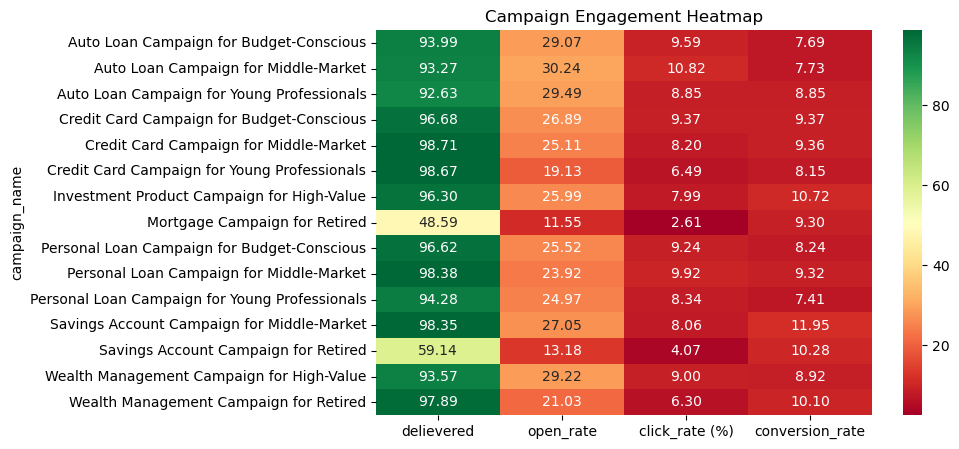

In [28]:
plt.figure(figsize=(8, 5))
sns.heatmap(
    conversion_rate_name.set_index("campaign_name"),
    annot=True, cmap="RdYlGn", fmt=".2f"
)
plt.title("Campaign Engagement Heatmap")
plt.show()


In [30]:
conversion_rate_type = (
    df_sent.groupby('campaign_type').agg(
      delievered = ('delivered','mean'),
      opened = ('opened','mean'),
      clicked = ('clicked','mean'),
      conversion_rate = ('conversion_status', 'mean')
      )
      .mul(100).reset_index()
      .rename(columns={'delivered':'delivered rate','conversion_status': 'conversion_rate (%)', 'clicked': 'click_rate (%)','opened':'open_rate'})
)
print(conversion_rate_type)

              campaign_type  delievered  open_rate  click_rate (%)  \
0               Direct Mail    0.000000   0.000000        0.000000   
1                     Email   97.982561  24.722175        7.283296   
2  Mobile App Notifications   92.107160  30.658337        9.875060   
3                       SMS   99.254781  20.584927        8.450506   

   conversion_rate  
0         6.827084  
1        11.266883  
2         8.241230  
3         7.438133  
